In [15]:
import pickle
import netCDF4
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

def load_variable(key, index):
    # key: mrso, snc, tos, tsl
    list = [f"{key}_raw",
            f"{key}_anom",
            f"{key}_clim",
            f"{key}_std",
            f"{key}_variance",
            f"{key}_coarse",
            f"{key}_coarse_anom",
            f"{key}_coarse_clim",
            f"{key}_coarse_std",
            f"{key}_coarse_variance"]
    
    path = f"/work/kajiyama/cnn/input/{key}/{list[index]}.npy"
    variable = np.load(path)
    return variable

def load_prcp(key):
    path = f"/work/kajiyama/cnn/input/pr/{key}"
    prcp = np.load(path)
    return prcp

def open_pickle(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    return data

def fill(x):
    f = ma.filled(x, fill_value=99999)
    return f

def mask(x):
    m = ma.masked_where(x>9999, x)
    return m

def conc(x, center_index=36, conc_dim=3):
    c = x.copy()
    c = fill(c)
    # modify depending on dim_size (model_ind, year_ind, lat, lon) expected in default
    x1, x2 = c[:, :, :, -center_index], c[:, :, :, :center_index]
    c = np.concatenatete([x1, x2], conc_dim)
    return c

def show(img):
    plt.imshow(img)
    plt.colorbar()
    plt.show()

# [tos] npyファイルの検証

(42, 165, 12, 120, 360)


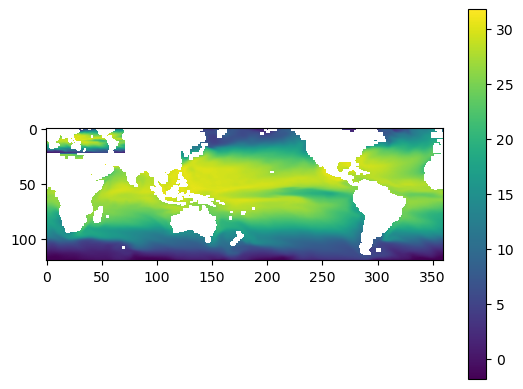

In [2]:
# key: mrso, snc, tos, tsl
key = "tos"
data = load_variable(key, 0)
print(data.shape)
data_masked = mask(data)
show(data_masked[1,0, 7, :, :])

# [prcp] npyファイルの検証

(42, 165, 120, 360)


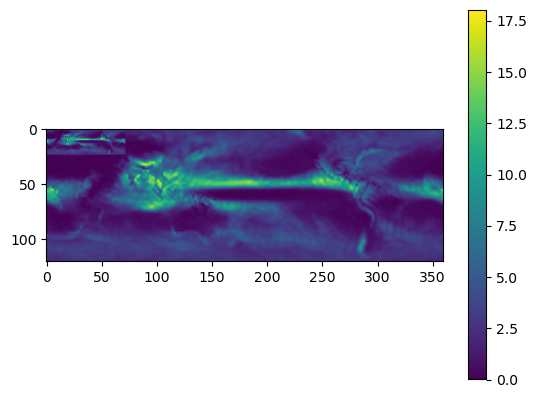

In [19]:
key = "continuous/world/1x1/pr_1x1_raw_MJJASO_world.npy"
#key = "continuous/world/5x5/pr_5x5_coarse_MJJASO_world.npy"
data = load_prcp(key)
print(data.shape)
show(data[0, 0, :, :])

# Pickleファイルの検証

dict_keys(['tos_raw', 'tos_clim', 'tos_variance', 'tos_anom', 'tos_std', 'tos_coarse', 'tos_coarse_clim', 'tos_coarse_variance', 'tos_coarse_anom', 'tos_coarse_std'])
(1980, 120, 360)


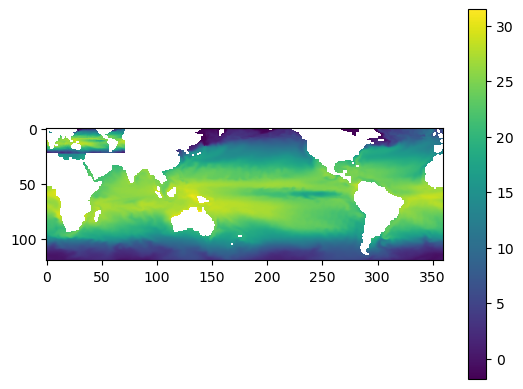

In [14]:
path = "/work/kajiyama/preprocessed/cmip6/AWI-ESM-1-1-LR/tos_AWI-ESM-1-1-LR.pickle"
data = open_pickle(path)
print(data.keys())
raw = data['tos_raw']
print(raw.shape)
show(raw[0,:,:])

(12, 180, 360)


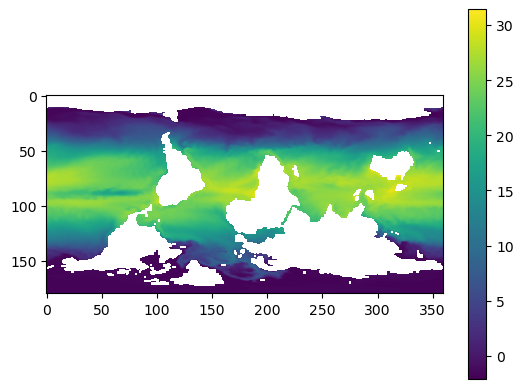

In [18]:
path = "/work/kajiyama/cdo/cmip6/AWI-ESM-1-1-LR/tos/tos_1850-1850.nc"
ds =  netCDF4.Dataset(path, 'r')
tos = ds.variables['tos'][:]
tos = tos[
print(tos.shape)
show(tos[0])